<ipython-input-7-d2e3efc98d26>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Mean_Departure_Delay", y="FLIGHT", data=pd_df, color="lightskyblue", ci=None)
<ipython-input-7-d2e3efc98d26>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Mean_Arrival_Delay", y="FLIGHT", data=pd_df, color="r", hatch='///', alpha=0.0, ci=None)


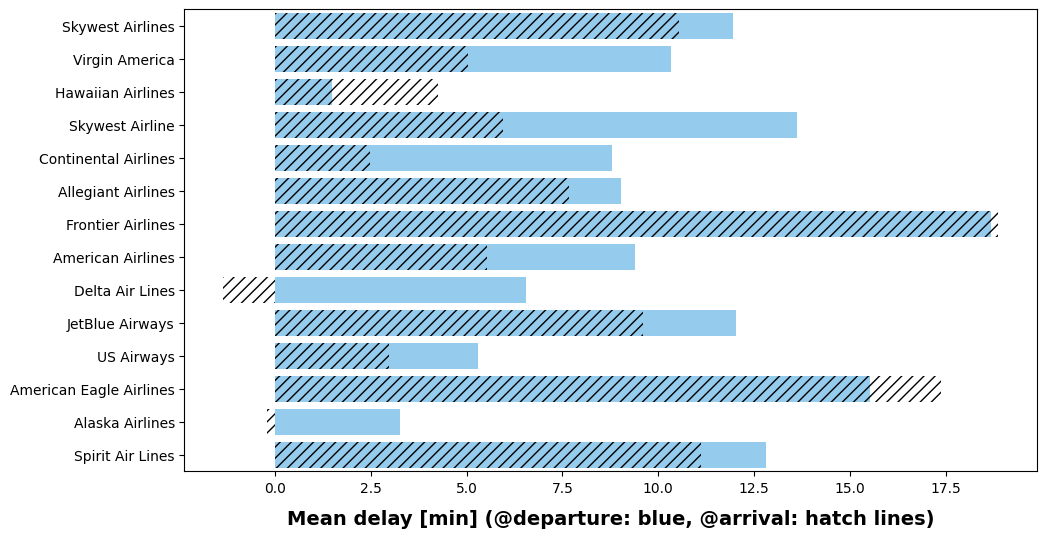

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SparkSession
spark = SparkSession.builder.appName("AirlineDelays").getOrCreate()

# Step 1: Load CSV using PySpark
df = spark.read.csv("cleaned__df.csv", header=True, inferSchema=True)

# Step 2: Calculate average delays per airline
avg_delays = df.groupBy("FLIGHT").agg(
    avg("DEPARTURE_DELAY").alias("Mean_Departure_Delay"),
    avg("ARRIVAL_DELAY").alias("Mean_Arrival_Delay")
)

# Step 3: Convert to Pandas for visualization
pd_df = avg_delays.toPandas()

# Step 4: Plot using Seaborn and Matplotlib
plt.figure(figsize=(11, 6))
sns.barplot(x="Mean_Departure_Delay", y="FLIGHT", data=pd_df, color="lightskyblue", ci=None)
sns.barplot(x="Mean_Arrival_Delay", y="FLIGHT", data=pd_df, color="r", hatch='///', alpha=0.0, ci=None)

plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)', fontsize=14, weight='bold', labelpad=10)
plt.ylabel(None)
plt.show()
